<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CH-8" data-toc-modified-id="CH-8-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CH 8</a></span><ul class="toc-item"><li><span><a href="#Building-an-interaction" data-toc-modified-id="Building-an-interaction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Building an interaction</a></span><ul class="toc-item"><li><span><a href="#Making-two-models" data-toc-modified-id="Making-two-models-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Making two models</a></span></li><li><span><a href="#Adding-an-indicator-variable-doesn’t-work" data-toc-modified-id="Adding-an-indicator-variable-doesn’t-work-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Adding an indicator variable doesn’t work</a></span></li><li><span><a href="#Adding-an-interaction-does-work" data-toc-modified-id="Adding-an-interaction-does-work-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Adding an interaction does work</a></span></li><li><span><a href="#Plotting-the-interaction" data-toc-modified-id="Plotting-the-interaction-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Plotting the interaction</a></span></li></ul></li><li><span><a href="#Symmetry-of-interactions" data-toc-modified-id="Symmetry-of-interactions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Symmetry of interactions</a></span></li><li><span><a href="#Continuous-interactions" data-toc-modified-id="Continuous-interactions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Continuous interactions</a></span><ul class="toc-item"><li><span><a href="#A-winter-flower" data-toc-modified-id="A-winter-flower-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>A winter flower</a></span></li><li><span><a href="#The-models" data-toc-modified-id="The-models-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>The models</a></span></li><li><span><a href="#Plotting-posterior-predictions" data-toc-modified-id="Plotting-posterior-predictions-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Plotting posterior predictions</a></span></li><li><span><a href="#Plotting-prior-predictions" data-toc-modified-id="Plotting-prior-predictions-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Plotting prior predictions</a></span></li></ul></li></ul></li><li><span><a href="#Practice-Problems" data-toc-modified-id="Practice-Problems-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Practice Problems</a></span></li><li><span><a href="#Homework-2019" data-toc-modified-id="Homework-2019-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Homework 2019</a></span></li></ul></div>

In [3]:
library(tidyverse)

# loads experimental branch of statistical rethinking pkg
library(rethinking, lib = "C:/Users/bings/Documents/R/test-library")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.0.1       v purrr   0.3.0  
v tidyr   0.8.2       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.0.1       v forcats 0.4.0  
Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract() masks rstan::extract()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x purrr::map()     masks rethinking::map()


# CH 8

## Building an interaction

In [2]:
## R code 8.1
# library(rethinking)
data(rugged)
d <- rugged
d %>% head

isocode,isonum,country,rugged,rugged_popw,rugged_slope,rugged_lsd,rugged_pc,land_area,lat,...,africa_region_w,africa_region_e,africa_region_c,slave_exports,dist_slavemkt_atlantic,dist_slavemkt_indian,dist_slavemkt_saharan,dist_slavemkt_redsea,pop_1400,european_descent
ABW,533,Aruba,0.462,0.380,1.226,0.144,0.000,18,12.508,...,0,0,0,0,NA,NA,NA,NA,614,NA
AFG,4,Afghanistan,2.518,1.469,7.414,0.720,39.004,65209,33.833,...,0,0,0,0,NA,NA,NA,NA,1870829,0
AGO,24,Angola,0.858,0.714,2.274,0.228,4.906,124670,-12.299,...,0,0,1,3610000,5.669,6.981,4.926,3.872,1223208,2
AIA,660,Anguilla,0.013,0.010,0.026,0.006,0.000,9,18.231,...,0,0,0,0,NA,NA,NA,NA,NA,NA
ALB,8,Albania,3.427,1.597,10.451,1.006,62.133,2740,41.143,...,0,0,0,0,NA,NA,NA,NA,200000,100
AND,20,Andorra,5.717,6.722,17.774,1.616,99.064,47,42.551,...,0,0,0,0,NA,NA,NA,NA,NA,NA


### Making two models

In [3]:
# make log version of outcome
d$log_gdp <- log( d$rgdppc_2000 )

# extract countries with GDP data
dd <- d[ complete.cases(d$rgdppc_2000) , ]

# rescale variables
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)

# split countries into Africa and not-Africa
d.A1 <- dd[ dd$cont_africa==1 , ] # Africa
d.A0 <- dd[ dd$cont_africa==0 , ] # not Africa

In [4]:
## R code 8.2
m8.1 <- quap(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a + b*( rugged_std - 0.215 ) ,
        a ~ dnorm( 1 , 1 ) ,
        b ~ dnorm( 0 , 1 ) ,
        sigma ~ dexp( 1 )
    ) , data=d.A1 )


In [6]:
## R code 8.3
set.seed(7)
prior <- extract.prior( m8.1 )

# set up the plot dimensions
plot( NULL , xlim=c(0,1) , ylim=c(0.5,1.5) ,
    xlab="ruggedness" , ylab="log GDP" )
abline( h=min(dd$log_gdp_std) , lty=2 )
abline( h=max(dd$log_gdp_std) , lty=2 )

# draw 50 lines from the prior
rugged_seq <- seq( from=-0.1 , to=1.1 , length.out=30 )
mu <- link( m8.1 , post=prior , data=data.frame(rugged_std=rugged_seq) )
for ( i in 1:50 ) lines( rugged_seq , mu[i,] , col=col.alpha("black",0.3) )

options(repr.plot.width=4.5, repr.plot.height=5)

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


plot without title

In [ ]:
## R code 8.5
m8.1 <- quap(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a + b*( rugged_std - 0.215 ) ,
        a ~ dnorm( 1 , 0.1 ) ,
        b ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp(1)
    ) , data=d.A1 )


In [ ]:
## R code 8.3 
set.seed(7)
prior <- extract.prior( m8.1 )

# set up the plot dimensions
plot( NULL , xlim=c(0,1) , ylim=c(0.5,1.5) ,
    xlab="ruggedness" , ylab="log GDP" )
abline( h=min(dd$log_gdp_std) , lty=2 )
abline( h=max(dd$log_gdp_std) , lty=2 )

# draw 50 lines from the prior
rugged_seq <- seq( from=-0.1 , to=1.1 , length.out=30 )
mu <- link( m8.1 , post=prior , data=data.frame(rugged_std=rugged_seq) )
for ( i in 1:50 ) lines( rugged_seq , mu[i,] , col=col.alpha("black",0.3) )

options(repr.plot.width=4.5, repr.plot.height=5)

In [ ]:
## R code 8.6
# Non-African nations
m8.2 <- quap(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a + b*( rugged_std - 0.215 ) ,
        a ~ dnorm( 1 , 0.1 ) ,
        b ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp(1)
    ) ,
    data=d.A0 )


### Adding an indicator variable doesn’t work

In [ ]:
## R code 8.7
m8.3 <- quap(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a + b*( rugged_std - 0.215 ) ,
        a ~ dnorm( 1 , 0.1 ) ,
        b ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=dd )


In [ ]:
## R code 8.8
# make variable to index Africa (1) or not (2)
dd$cid <- ifelse( dd$cont_africa==1 , 1 , 2 )

In [ ]:
## R code 8.9
m8.4 <- quap(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a[cid] + b*( rugged_std - 0.215 ) ,
        a[cid] ~ dnorm( 1 , 0.1 ) ,
        b ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=dd )


In [ ]:
## R code 8.10
compare( m8.3 , m8.4 ) %>% round(2)

In [ ]:
precis( m8.4 , depth=2 ) %>% round(2)

In [ ]:

## R code 8.12
rugged.seq <- seq( from=-0.1 , to=1.1 , length.out=30 )

# compute mu over samples, fixing cid=2
mu.NotAfrica <- link( m8.4 ,
    data=data.frame( cid=2 , rugged_std=rugged.seq ) )

# compute mu over samples, fixing cid=1
mu.Africa <- link( m8.4 ,
    data=data.frame( cid=1 , rugged_std=rugged.seq ) )

# summarize to means and intervals
mu.NotAfrica_mu <- apply( mu.NotAfrica , 2 , mean )
mu.NotAfrica_ci <- apply( mu.NotAfrica , 2 , PI , prob=0.97 )
mu.Africa_mu <- apply( mu.Africa , 2 , mean )
mu.Africa_ci <- apply( mu.Africa , 2 , PI , prob=0.97 )


### Adding an interaction does work

In [ ]:
## R code 8.13
m8.5 <- quap(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a[cid] + b[cid]*( rugged_std - 0.215 ) ,
        a[cid] ~ dnorm( 1 , 0.1 ) ,
        b[cid] ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=dd )

In [ ]:
precis( m8.5 , depth=2 ) %>% round(2)

How much does allowing the slope to vary improve expected prediction? Let’s use WAIC
to compare this new model to the previous two. You could use LOO here as well. It’ll give
almost identical results.

In [ ]:
compare( m8.3 , m8.4 , m8.5 ) %>% round(2)

In [ ]:
waic_list <- WAIC( m8.5 , pointwise=TRUE ) 

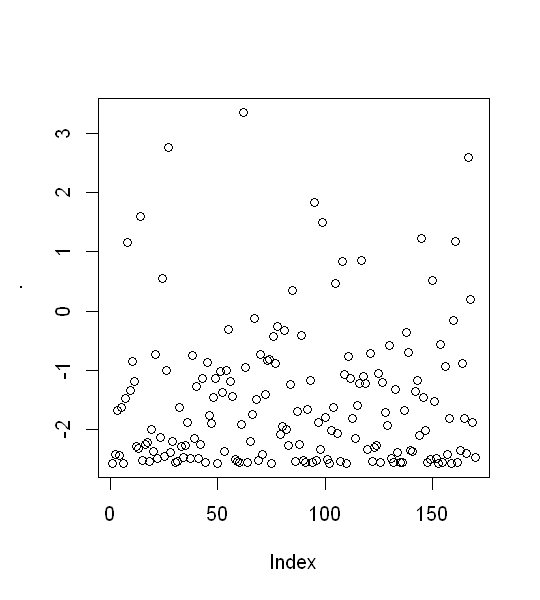

In [43]:
waic_list %>% plot

### Plotting the interaction

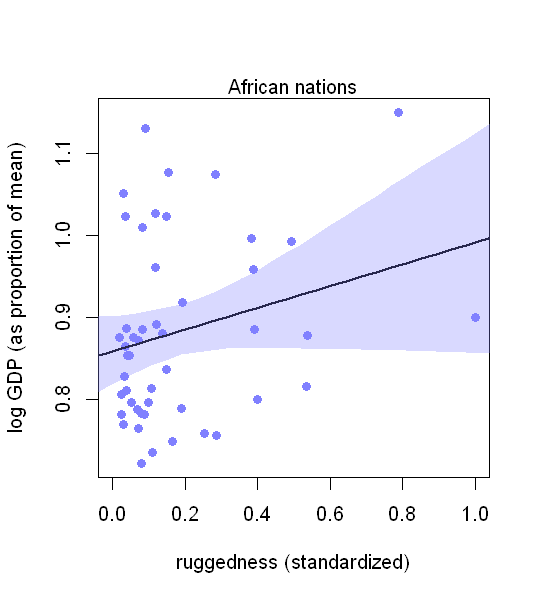

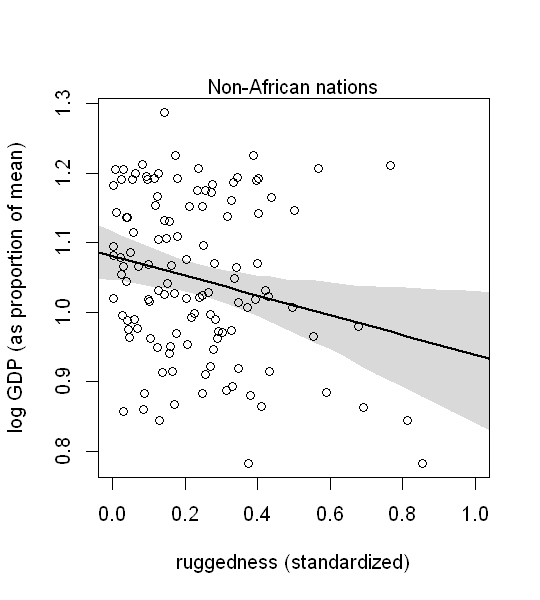

In [45]:
## R code 8.17
# plot Africa - cid=1
plot( d.A1$rugged_std , d.A1$log_gdp_std , pch=16 , col=rangi2 ,
    xlab="ruggedness (standardized)" , ylab="log GDP (as proportion of mean)" ,
    xlim=c(0,1) )
mu <- link( m8.5 , data=data.frame( cid=1 , rugged_std=rugged_seq ) )
mu_mean <- apply( mu , 2 , mean )
mu_ci <- apply( mu , 2 , PI , prob=0.97 )
lines( rugged_seq , mu_mean , lwd=2 )
shade( mu_ci , rugged_seq , col=col.alpha(rangi2,0.3) )
mtext("African nations")

# plot non-Africa - cid=2
plot( d.A0$rugged_std , d.A0$log_gdp_std , pch=1 , col="black" ,
    xlab="ruggedness (standardized)" , ylab="log GDP (as proportion of mean)" ,
    xlim=c(0,1) )
mu <- link( m8.5 , data=data.frame( cid=2 , rugged_std=rugged_seq ) )
mu_mean <- apply( mu , 2 , mean )
mu_ci <- apply( mu , 2 , PI , prob=0.97 )
lines( rugged_seq , mu_mean , lwd=2 )
shade( mu_ci , rugged_seq )
mtext("Non-African nations")


## Symmetry of interactions

## Continuous interactions

### A winter flower

### The models

In [47]:
## R code 8.19
library(rethinking)
data(tulips)
d <- tulips
str(d)

'data.frame':	27 obs. of  4 variables:
 $ bed   : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 2 ...
 $ water : int  1 1 1 2 2 2 3 3 3 1 ...
 $ shade : int  1 2 3 1 2 3 1 2 3 1 ...
 $ blooms: num  0 0 111 183.5 59.2 ...


In [50]:

## R code 8.20
d$blooms_std <- d$blooms / max(d$blooms)
d$water_cent <- d$water - mean(d$water)
d$shade_cent <- d$shade - mean(d$shade)


In [55]:
## R code 8.21
a <- rnorm( 1e4 , 0.5 , 1 )
sum( a < 0 | a > 1 ) / length( a )

## R code 8.22
a <- rnorm( 1e4 , 0.5 , 0.25 )
sum( a < 0 | a > 1 ) / length( a )

[1] 0.6194

[1] 0.0438

In [52]:
## R code 8.23
m8.6 <- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a + bw*water_cent + bs*shade_cent ,
        a ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dnorm( 0 , 0.25 ) ,
        bs ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=d )


In [56]:

## R code 8.24
m8.7 <- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent ,
        a ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dnorm( 0 , 0.25 ) ,
        bs ~ dnorm( 0 , 0.25 ) ,
        bws ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=d )


### Plotting posterior predictions

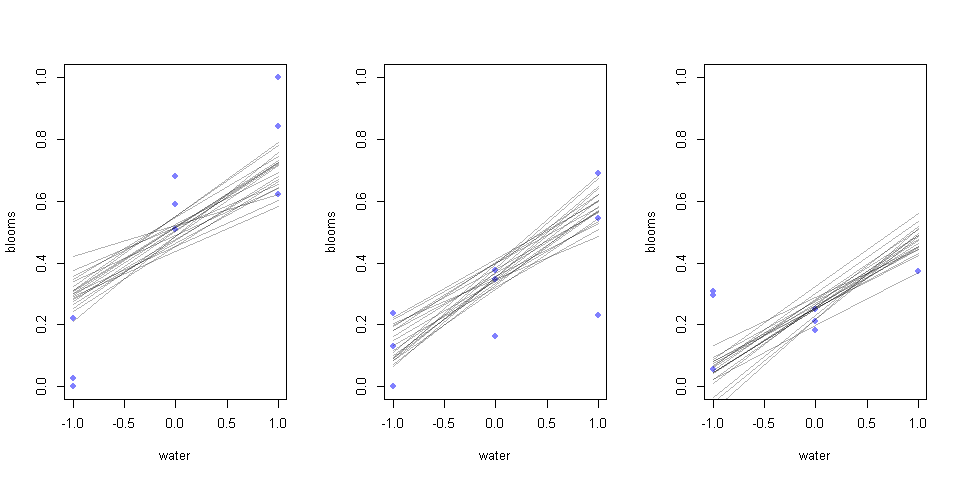

In [66]:
## R code 8.25
par(mfrow=c(1,3)) # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,1) ,
        xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.6 , data=data.frame( shade_cent=s , water_cent=-1:1 ) )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}
options(repr.plot.width=8, repr.plot.height=4)

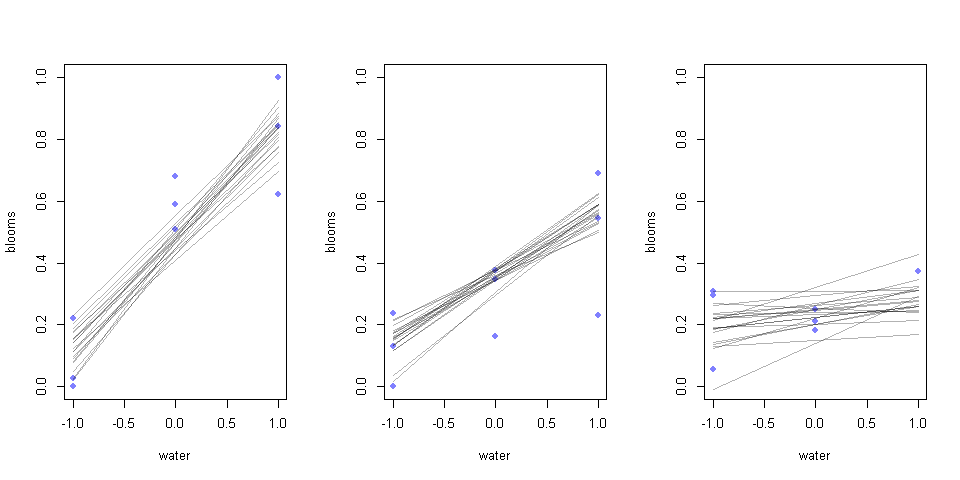

In [68]:
## R code 8.25
par(mfrow=c(1,3)) # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,1) ,
        xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.7 , data=data.frame( shade_cent=s , water_cent=-1:1 ) )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}
options(repr.plot.width=8, repr.plot.height=4)

### Plotting prior predictions

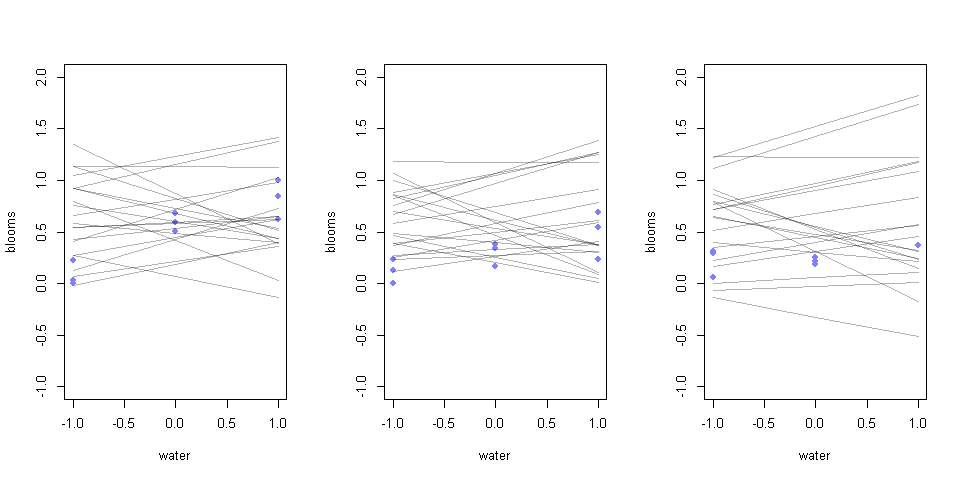

In [77]:
## R code 8.26
set.seed(7)
prior <- extract.prior(m8.6)


## R code 8.25
par(mfrow=c(1,3)) # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(-1,2) ,
        xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.6 , data=data.frame( shade_cent=s , water_cent=-1:1 ), post=prior )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}
options(repr.plot.width=8, repr.plot.height=4)

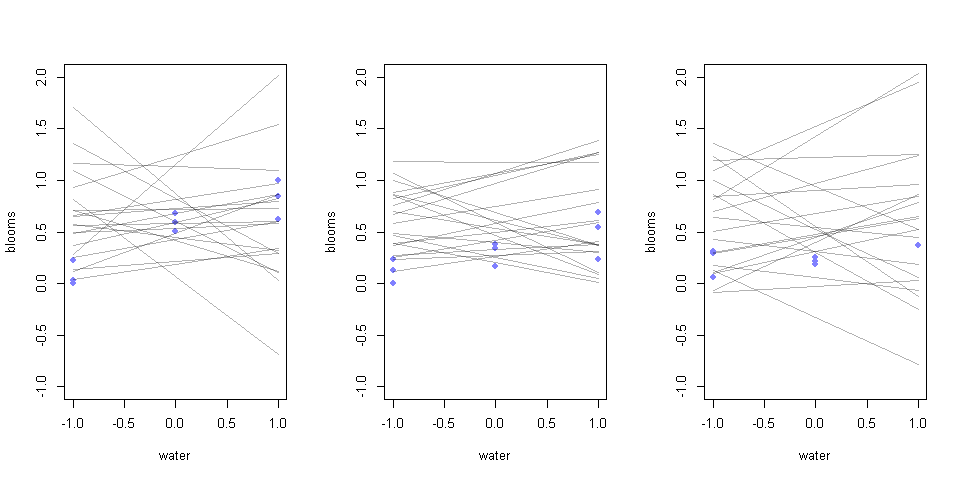

In [79]:
## R code 8.26
set.seed(7)
prior <- extract.prior(m8.7)


## R code 8.25
par(mfrow=c(1,3)) # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(-1,2) ,
        xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.7 , data=data.frame( shade_cent=s , water_cent=-1:1 ), post=prior )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}
options(repr.plot.width=8, repr.plot.height=4)

# Practice Problems

##### 7H1

In [ ]:
library(rethinking) 
data(tulips)
d <- tulips

In [7]:
d$bed

[1] a a a a a a a a a b b b b b b b b b c c c c c c c c c
Levels: a b c

In [4]:
d %>% head

bed,water,shade,blooms
a,1,1,0.00
a,1,2,0.00
a,1,3,111.04
a,2,1,183.47
a,2,2,59.16
a,2,3,76.75


In [6]:
d$water %>% summary
d$water %>% table

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       2       2       3       3 

.
1 2 3 
9 9 9 

In [8]:
library(rethinking) 
data(nettle)
d <- nettle
d$log_langpc <- log( d$num.lang / d$k.pop )
d$log_area <- log(d$area)

In [9]:
d %>% head

country,num.lang,area,k.pop,num.stations,mean.growing.season,sd.growing.season,log_langpc,log_area
Algeria,18,2381741,25660,102,6.60,2.29,-7.262317,14.68334
Angola,42,1246700,10303,50,6.22,1.87,-5.502521,14.03601
Australia,234,7713364,17336,134,6.00,4.17,-4.305219,15.85846
Bangladesh,37,143998,118745,20,7.40,0.73,-8.073816,11.87755
Benin,52,112622,4889,7,7.14,0.99,-4.543499,11.63179
Bolivia,38,1098581,7612,48,6.92,2.50,-5.299895,13.90953


# Homework 2019